SARSA Grid
[[1. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 3.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]
Q-learning Grid
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]


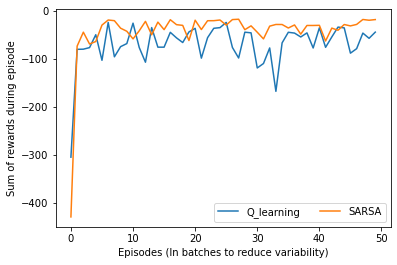

In [190]:
import numpy as np
import matplotlib.pyplot as plt

def move(pos, action):
    (pos1 , pos2) = pos
    # up 
    if ((action == 0) and pos1 > 0):
        pos1 = pos1 - 1
    # down
    if ((action == 1) and (pos1 < 3)):
        pos1 = pos1 + 1
    # right
    if((action == 2) and (pos2 < 11)):
        pos2 = pos2 + 1
    # left
    if((action == 3) and (pos2 > 0)):
        pos2 = pos2 - 1
    
    pos = (pos1, pos2)
    if(pos1 == 3 and pos2 < 11 and pos2 > 0): #Cliffed
        pos = (3,0)
    
    return pos   

def qlearning(num_episodes = 500, gamma = 1, alpha = 0.5, ϵ = 0.1):
    reward_list = list() #Used to graph reward during episode
    q = np.zeros((4, 12 * 4))
    for episode in range(0, num_episodes):
        grid = np.zeros((4, 12))
        pos = (3, 0) 
        grid[pos[0]][pos[1]] = 1
        ep_reward = 0 
        state = 12 * pos[0] + pos[1]
        while(True):
            if(np.random.random() < ϵ):
                action = np.random.choice(4)
            else:
                action = np.argmax(q[:, state]) 
            pos = move(pos, action)
            reward = -1
            if (pos == (3,0)):
                reward = -100
            grid[pos[0]][pos[1]] = action + 1
            next_state = 12 * pos[0] + pos[1]
            max_action_value = np.amax(q[:, int(next_state)])
            if (next_state == 47):
                break
            ep_reward += reward 
            q[action, state] = q[action, state] + alpha * (reward + (gamma * max_action_value) - q[action, state])
            state = next_state
        reward_list.append(ep_reward)
        if(episode == 499):
            print("Q-learning Grid")
            print(grid)
    return q, reward_list

def sarsa(num_episodes = 500, gamma = 1, alpha = 0.5, ϵ = 0.1):
    q = np.zeros((4, 12 * 4))
    reward_list = list()
    for episode in range(0, num_episodes):
        pos = (3, 0)
        ep_reward = 0 
        grid = np.zeros((4, 12))
        grid[pos[0]][pos[1]] = 1
        state = 12 * pos[0] + pos[1]
        if(np.random.random() < ϵ):
            action = np.random.choice(4)
        else:
            action = np.argmax(q[:, state]) 
        while(True):
            pos = move(pos, action)
            reward = -1
            if (pos == (3,0)):
                reward = -100
            grid[pos[0]][pos[1]] = action + 1
            next_state = 12 * pos[0] + pos[1]
            if (next_state == 47):
                break
            ep_reward += reward 
            if(np.random.random() < ϵ):
                next_action = np.random.choice(4)
            else:
                next_action = np.argmax(q[:, next_state]) 
            next_action_val = q[next_action][next_state] 
            q[action, state] = q[action, state] + alpha * (reward + (gamma * next_action_val) - q[action, state])
            state = next_state
            action = next_action
        reward_list.append(ep_reward)
        if(episode == 499):
            print("SARSA Grid")
            print(grid)  
    return q, reward_list
    
def plot_reward(rlist_q, rlist_SARSA):
    rq = []
    rSARSA = []
    count = 0 
    rewardq = 0
    rewardSARSA = 0
    for i in range(0,len(rlist_q)):
        count = count + 1
        rewardq += rlist_q[i]
        rewardSARSA += rlist_SARSA[i]
        if(count == 10):
            batch_rewardq = rewardq/count
            rq.append(batch_rewardq)
            batch_rewardSARSA = rewardSARSA/count
            rSARSA.append(batch_rewardSARSA)
            rewardq = 0
            rewardSARSA = 0
            count = 0  
    plt.plot(rq, label = "Q_learning")
    plt.plot(rSARSA, label = "SARSA")
    plt.ylabel("Sum of rewards during episode")
    plt.xlabel("Episodes (In batches to reduce variability)")
    plt.legend(ncol=2)
    plt.show()
    
#SARSA
qSARSA, rlist_SARSA = sarsa()
# QLEARNING
qq, rlist_q = qlearning()
plot_reward(rlist_q, rlist_SARSA)

From the grids printed above, we can see that the policy for both Q-learning and SARSA roughly match those in Example 6.6 where 1 = up, 2 = down, 3 = right, and 4  = left where Q-learning finds the most optimal but unsafe path to the goal and SARSA finds a longer but safer path to the goal. It looks like SARSA is at around 30-40 reward average and Q-learning is at 50-70 reward average. There is far more variablility in my solution but that can be attributed to fairly large value of ϵ (tried to reduce by batching data). 

Below the grids is the graph of the performance of both Q-learning and SARSA. The reason that Q-learning has a lower average reward is because the path that it takes is far more risky (since it desires the most optimal and quick path). This means that it sometimes enters the cliff region due to the ϵ-greedy action selection that sometimes occurs and recieves a large penalty (reward - 100) resulting in a reduced average reward compared to SARSA's safe pathing.

Q-learning is considered an off-policy method because the action that Q-learning uses to update its action-value function is derived from the ϵ-greedy policy and is being used to update our action-value function. Essentially, we are using a separate policy (ϵ-greedy policy) to make decisions for our actions and then updating our actual policy, meaning we are not using our actual policy to update, unlike in SARSA (on-policy), which uses the next iterates of the policy (Q(S', A')) to update the current policy. 